In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [42]:
def df(x: np.ndarray, y: np.ndarray):
    res = -np.sin(y) * np.cos(x)
    return res


def f(x: float, y: float):
    res = math.cos(y)
    return res


def g(x: float, y: float):
    res = math.sin(x)
    return res


def g12(x: np.ndarray, indexX: int, y: np.ndarray, indexY: int):
    res = g(x[indexX + 1][0], y[0][indexY + 1]) + \
          g(x[indexX + 1][0], y[0][indexY]) +\
          g(x[indexX][0], y[0][indexY + 1]) +\
          g(x[indexX][0], y[0][indexY])
    res /= 4
    return res


In [43]:
minX = -10
maxX = 10
sizeX = 200
lengthX = maxX - minX
dx = lengthX / (sizeX - 1)

x = np.linspace(minX, maxX, sizeX)

minY = -10
maxY = 10
sizeY = 200
lengthY = maxY - minY
dy = lengthY / (sizeY - 1)

y = np.linspace(minY, maxY, sizeY)

y, x = np.meshgrid(y, x)

dzExact = df(x, y)
dz = np.copy(dzExact)

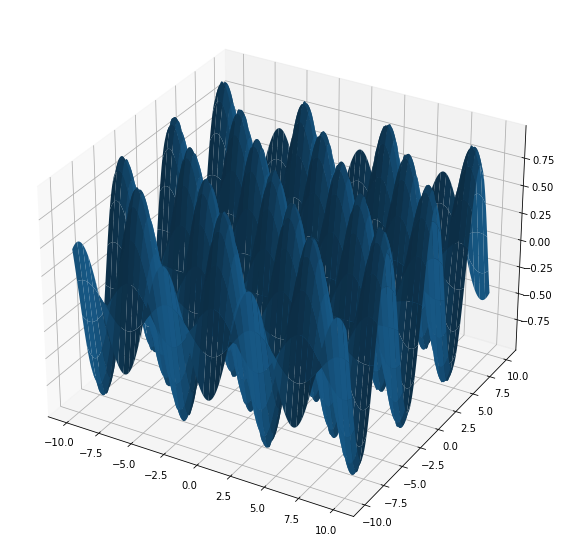

In [44]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, dzExact)

In [45]:
for i in range(1, sizeX - 1):
    for j in range(1, sizeY - 1):
        dz[i][j] = f(x[i - 1][0], y[0][j - 1]) * g12(x, i - 1, y, j - 1) +\
                   f(x[i - 1][0], y[0][j]) * (-g12(x, i - 1, y, j - 1) + g12(x, i - 1, y, j)) +\
                   f(x[i - 1][0], y[0][j + 1]) * -g12(x, i - 1, y, j) +\
                   f(x[i][0], y[0][j - 1]) * (g12(x, i - 1, y, j - 1) - g12(x, i, y, j - 1)) +\
                   f(x[i][0], y[0][j]) * (-g12(x, i - 1, y, j - 1) + g12(x, i - 1, y, j) + g12(x, i, y, j - 1) - g12(x, i, y, j)) +\
                   f(x[i][0], y[0][j + 1]) * (-g12(x, i - 1, y, j) + g12(x, i, y, j))+\
                   f(x[i + 1][0], y[0][j - 1]) * -g12(x, i, y, j - 1)+\
                   f(x[i + 1][0], y[0][j]) * (g12(x, i, y, j - 1) - g12(x, i, y, j))+\
                   f(x[i + 1][0], y[0][j + 1]) * g12(x, i, y, j)
        dz[i][j] /= (4 * dx * dy)
        #dz[i][j] = 1


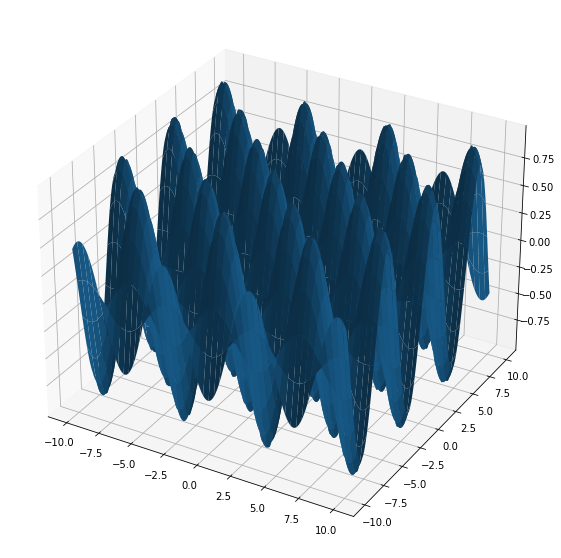

In [46]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, dz)

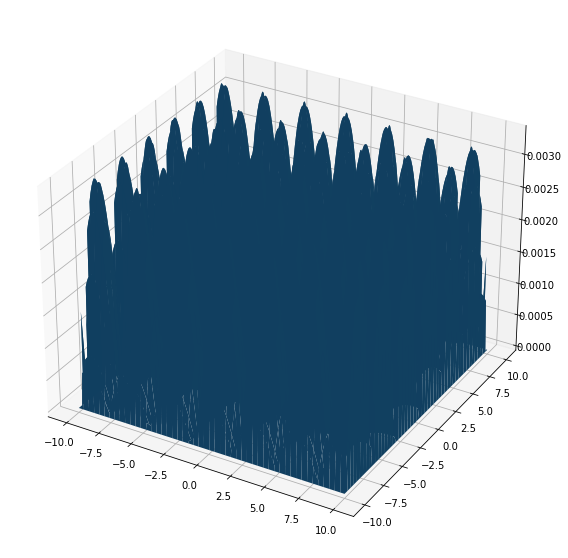

In [48]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, np.abs(dz - dzExact))